In [ ]:
#Problem statement: Crime rate prediction using Machine Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [ ]:
data=pd.read_csv('/content/car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape # showing the number of Rows and colums in data set

(301, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
#missing values calumns wise
data.isnull().sum(axis=0).sort_values()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
# total no of NAN values in dataset
data.isnull().sum().sum()

0

In [ ]:
# we convert the categorical data into numerical data
my_data=pd.get_dummies(data,columns=['Car_Name','Fuel_Type','Selling_type','Transmission'],drop_first=True) # Changed new_data to data
my_data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 106 entries, Year to Transmission_Manual
dtypes: bool(101), float64(2), int64(3)
memory usage: 41.6 KB


<Axes: >

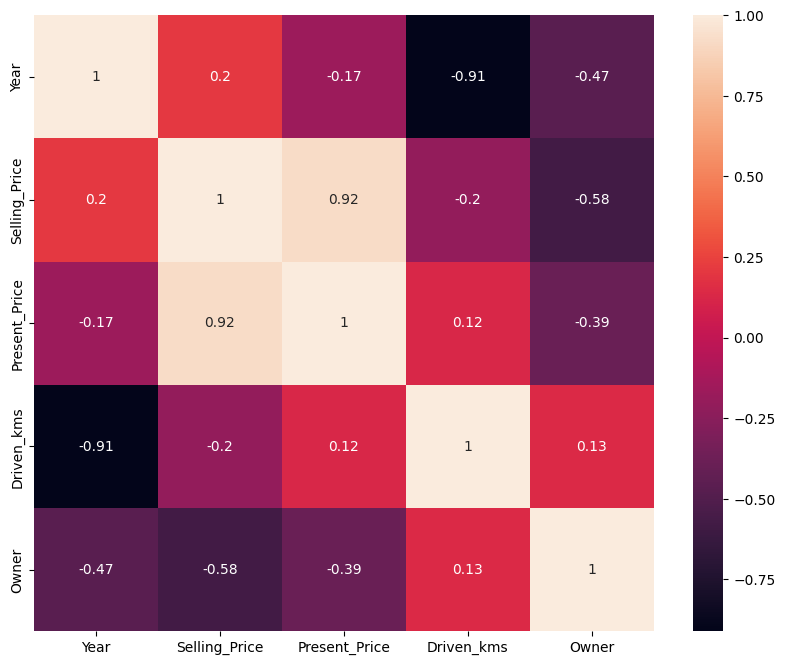

In [ ]:
df=data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
snr.heatmap(df.corr(),annot=True)

#we visualization on categorical data

<Axes: xlabel='Car_Name', ylabel='count'>

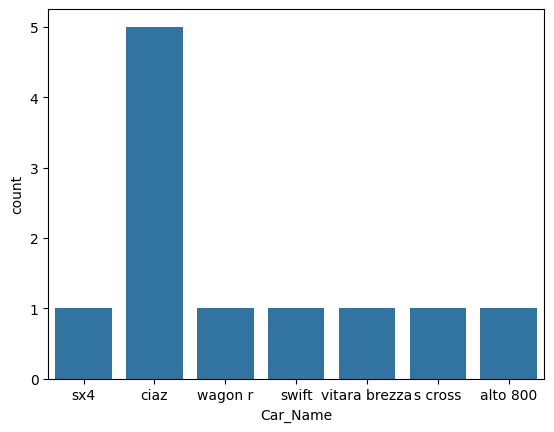

In [ ]:
snr.countplot(x='Car_Name',data=data.iloc[1:12])

<Axes: xlabel='Fuel_Type', ylabel='count'>

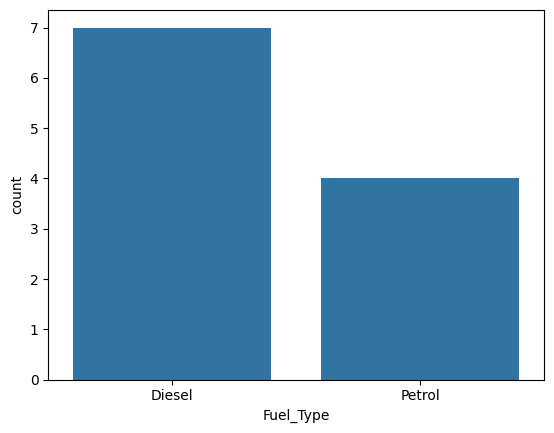

In [ ]:
snr.countplot(x='Fuel_Type',data=data.iloc[1:12])

<Axes: xlabel='Selling_type', ylabel='count'>

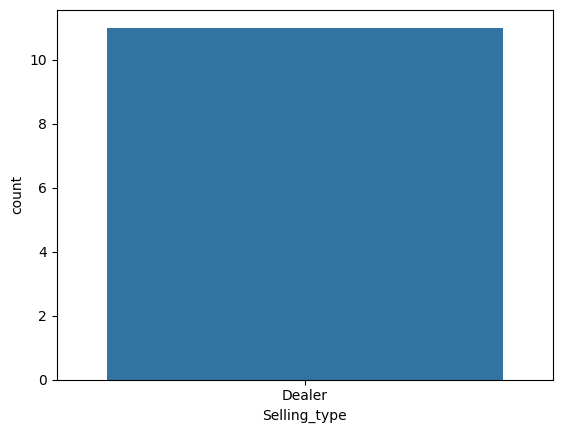

In [ ]:
snr.countplot(x='Selling_type',data=data.iloc[1:12])

<Axes: xlabel='Transmission', ylabel='count'>

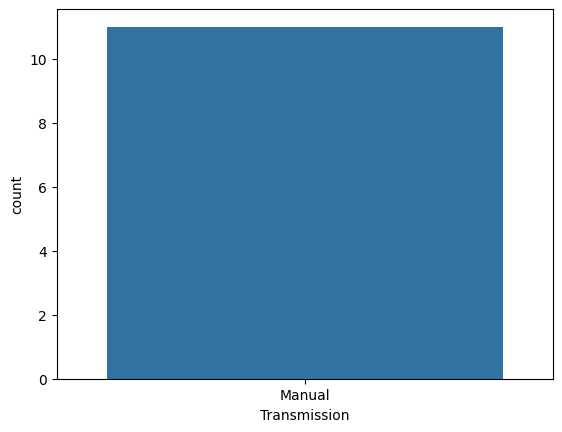

In [ ]:
snr.countplot(x='Transmission',data=data.iloc[1:12])

#we analysis the data on numerical value

<Axes: >

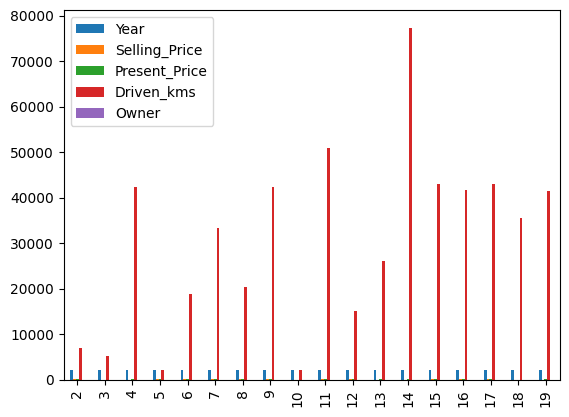

In [ ]:
my_data.iloc[2:20].plot(kind='bar')

<Axes: ylabel='Frequency'>

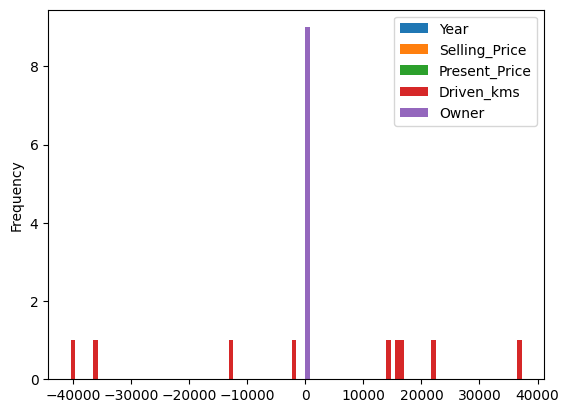

In [ ]:
my_data.iloc[0:10].diff().plot(kind='hist',bins=100)

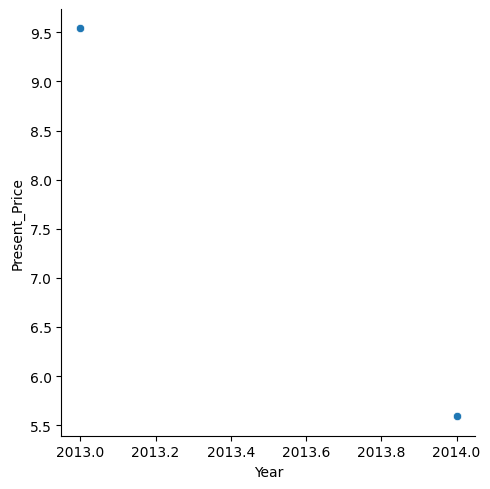

In [ ]:
snr.relplot(y='Present_Pric',x='Year',data=my_data)

<Axes: >

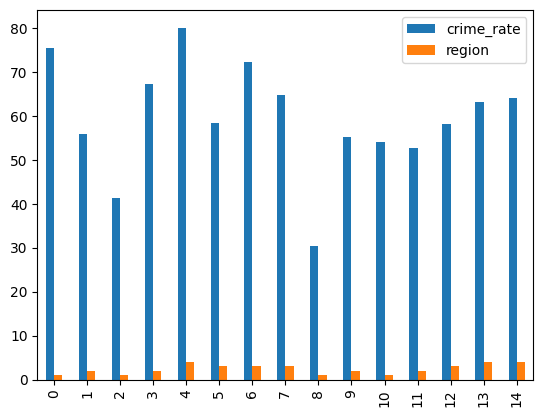

In [ ]:
df=data[['crime_rate','region']]
df.iloc[0:15].plot(kind='bar')

<Axes: >

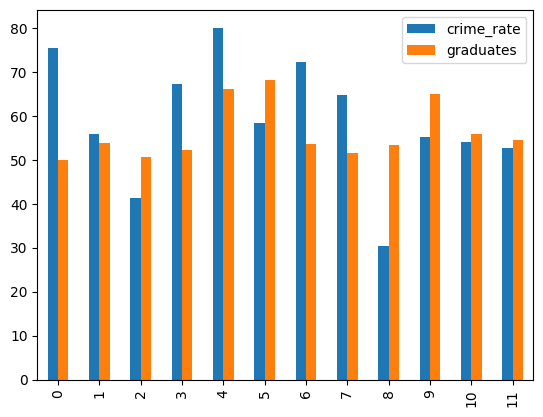

In [ ]:
df=data[['crime_rate','graduates']]
df.iloc[0:12].plot(kind='bar')

<Axes: >

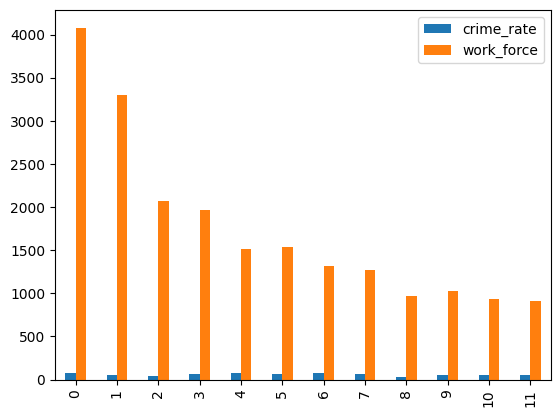

In [ ]:
df=data[['crime_rate','work_force']]
df.iloc[0:12].plot(kind='bar')

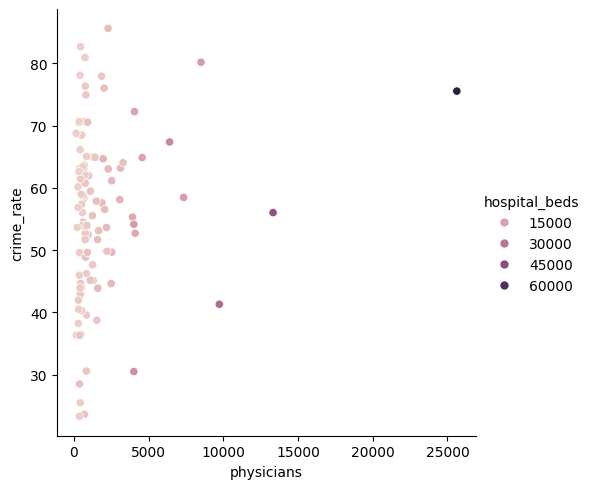

In [ ]:
snr.relplot(y='crime_rate',x='physicians',hue='hospital_beds',data=data)

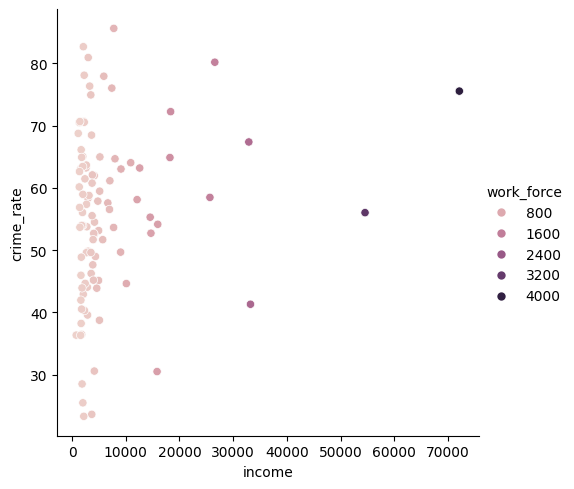

In [ ]:
snr.relplot(y='crime_rate',x='income',hue='work_force',data=data)

<Axes: ylabel='1'>

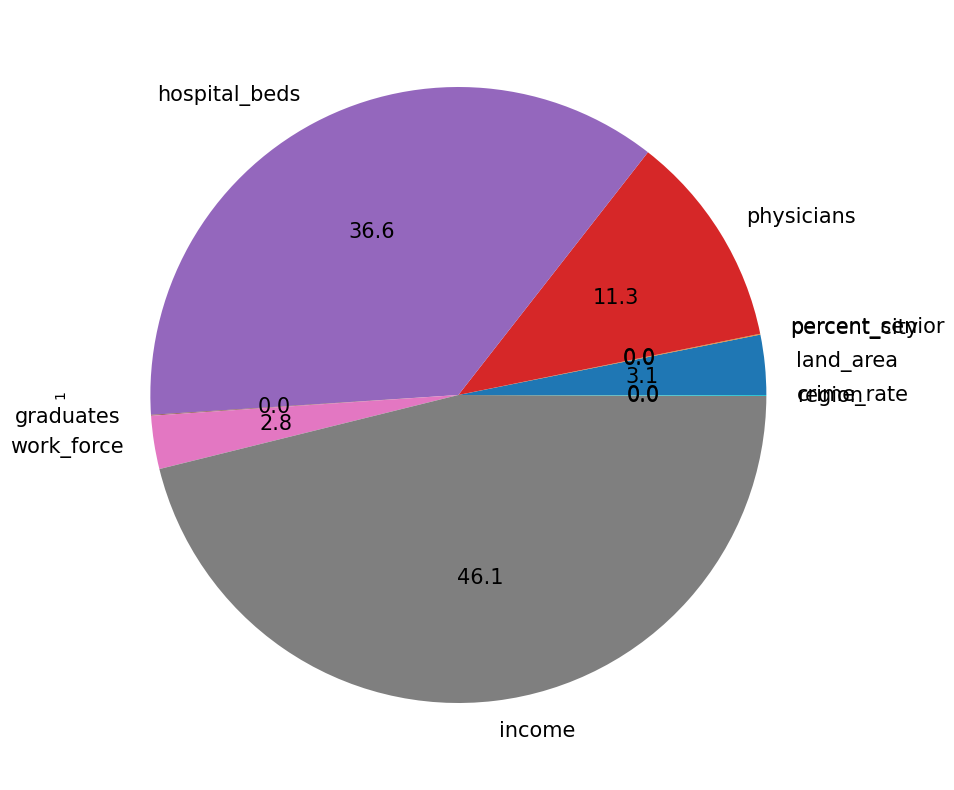

In [ ]:
data.iloc[1].plot.pie(figsize=(10,10),fontsize=15,autopct='%0.1f')

In [ ]:
# splitting the data into train and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8) # we consider 80 % data for traing and 20 % data for testing

In [ ]:
# applying the linear regression for creating MLM
from sklearn.linear_model import LinearRegression
regression=LinearRegression() #activating the algorithim


In [ ]:
regression.fit(x_train,y_train) #training the MLM

LinearRegression()

In [ ]:
predict=regression.predict(x_test) #future prediction by MLM

In [ ]:
regression.score(x,y) #this accuracy is not good , so we use onther regression method

0.49644826195715985

In [ ]:
# applying Desion tree algorithm
from sklearn.tree import DecisionTreeRegressor
tree_regressor=DecisionTreeRegressor() #activating the algorithm
tree_regressor.fit(x_train,y_train) #training the data

DecisionTreeRegressor()

In [ ]:
drt_predict=tree_regressor.predict(x_test)

In [ ]:
tree_regressor.score(x,y) # this score is best for MLM, it also best as compare to linear regression

0.8721400978531882

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_regressor=RandomForestRegressor()
random_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
random_prediction=random_regressor.predict(x_test)

In [ ]:
random_regressor.score(x,y) # this score is better than lineear regression but not DecisonTree regressor

0.8352583272162997

In [ ]:
data.head(10)

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19
5,2815,23.1,6.7,7340,16941,68.3,1541.9,25663,3,58.48
6,8360,46.3,8.2,4047,14347,53.6,1321.2,18350,3,72.25
7,6794,60.1,6.3,4562,14333,51.7,1272.7,18221,3,64.88
8,3049,19.5,12.1,4005,21149,53.4,967.5,15826,1,30.51
9,4647,31.5,9.2,3916,12815,65.1,1032.2,14542,2,55.30


 # To create new data set with help of Decision tree Regressor algorithim

In [ ]:
new_data={'land_area':1284,'percent_city':65,'percent_senior':10,'physicians':20627,'hospital_beds':60678,'graduates':50,'work_force':4888,'income':45100,'region':4}
index=[1]

In [ ]:
my_data=pd.DataFrame(new_data,index)

In [ ]:
my_data

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
1,1284,65,10,20627,60678,50,4888,45100,4


In [ ]:
new_prediction=tree_regressor.predict(my_data)

In [ ]:
print('crime rate for new data set is',new_prediction)

crime rate for new data set is [80.94]


In [ ]:
new_data={'land_area':33004,'percent_city':20,'percent_senior':15,'physicians':44566,'hospital_beds':885567,'graduates':99,'work_force':2078,'income':78654,'region':2}
index=[1]

In [ ]:
my_new_data=pd.DataFrame(new_data,index)
my_new_data

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region
1,33004,20,15,44566,885567,99,2078,78654,2


In [ ]:
ne_prediction=random_regressor.predict(my_new_data)
print('crime rate for new data set is',ne_prediction)

crime rate for new data set is [60.7305]
